In [10]:
# Download the files from refinedweb hub
import os
import random
from datasets import load_dataset
from datasets import Dataset, interleave_datasets , concatenate_datasets
import pandas as pd
from functools import partial
from datasets import Dataset

# Set the file pattern for the dataset
file_pattern = "train-{:05d}-of-05534-*"

# Set the number of files to sample
num_files_to_sample = 5

# Get a list of all file paths matching the pattern
all_file_paths = [os.path.join("data/", file_pattern.format(i)) for i in range(5534)]
print(all_file_paths[0])
# Randomly sample the desired number of file paths
sampled_file_paths = random.sample(all_file_paths, num_files_to_sample)
# Load and document the sampled files
seeds = load_dataset("tiiuae/falcon-refinedweb", split = 'train',streaming=True)
def gen_from_iterable_dataset(iterable_ds):
    yield from iterable_ds
    
finalds = seeds.take(1)
finalds = Dataset.from_generator(partial(gen_from_iterable_dataset, finalds), features=finalds.features)

# finalds = concatenate_datasets([finalds,finalds])
for file_path in sampled_file_paths:
 # Load the file as a dataset
 iterable_ds = load_dataset("tiiuae/falcon-refinedweb", split = 'train',data_files=file_path, streaming=True)

 ds = Dataset.from_generator(partial(gen_from_iterable_dataset, iterable_ds), features=iterable_ds.features)
 finalds = concatenate_datasets([finalds,ds])

finalds.save_to_disk("test.hf")

data/train-00000-of-05534-*


Found cached dataset generator (C:/Users/Long/.cache/huggingface/datasets/generator/default-a8992e25aa5626b2/0.0.0)


Generating train split: 0 examples [00:00, ? examples/s]

Dataset generator downloaded and prepared to C:/Users/Long/.cache/huggingface/datasets/generator/default-24de5f2a2a10fd73/0.0.0. Subsequent calls will reuse this data.


Generating train split: 0 examples [00:00, ? examples/s]

Dataset generator downloaded and prepared to C:/Users/Long/.cache/huggingface/datasets/generator/default-e938f6c0327544e9/0.0.0. Subsequent calls will reuse this data.


Generating train split: 0 examples [00:00, ? examples/s]

Dataset generator downloaded and prepared to C:/Users/Long/.cache/huggingface/datasets/generator/default-5de772a3cb5e0c5e/0.0.0. Subsequent calls will reuse this data.


Generating train split: 0 examples [00:00, ? examples/s]

Dataset generator downloaded and prepared to C:/Users/Long/.cache/huggingface/datasets/generator/default-c3f370a605c9098e/0.0.0. Subsequent calls will reuse this data.


Generating train split: 0 examples [00:00, ? examples/s]

Dataset generator downloaded and prepared to C:/Users/Long/.cache/huggingface/datasets/generator/default-10996592ac9f1358/0.0.0. Subsequent calls will reuse this data.


Saving the dataset (0/5 shards):   0%|          | 0/874594 [00:00<?, ? examples/s]

In [24]:
# Sample refinedweb dataset
import os
import random
from datasets import load_dataset
from datasets import Dataset, interleave_datasets , concatenate_datasets
import pandas as pd
from functools import partial
from datasets import Dataset

# Load .hf from disk
ds = Dataset.load_from_disk("dataset.hf")
shuffled_ds = ds.shuffle(seed=42)
ds2 = shuffled_ds[:50]
ds2 = Dataset.from_dict(ds2)
df = pd.DataFrame(ds2)
df.head(50).to_csv("refinedweb_sample.csv", index=False)

Loading cached shuffled indices for dataset at d:\sfu\courses\2024 courses\spring 2024\cmpt 419\Assignment 3\dataset.hf\cache-c76527dd04b904bc.arrow


In [3]:
# Domain stats for refinedweb
import os
import random
from datasets import load_dataset
from datasets import Dataset, interleave_datasets , concatenate_datasets
import pandas as pd
from functools import partial
from datasets import Dataset
from urllib.parse import urlparse

data = Dataset.load_from_disk("dataset.hf")

df = pd.DataFrame(data)

# Function to extract domain from URL
def extract_domain(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc

df['domain'] = df['url'].apply(extract_domain)

domain_stats = df['domain'].value_counts()

domain_stats.to_csv('domain_stats.csv', header=['count'])

In [4]:
# Stats for selected dataset
import pandas as pd

df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", header=None)

gender_column = df.iloc[:, 1]

gender_stats = gender_column.describe()

gender_stats.to_csv('gender_stat.csv')


In [34]:
# Sample selected dataset 
import pandas as pd


df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
sampled_df = df.sample(n=50, random_state=42)
headerList = ['age', 'gender', 'total_Bilirubin', 'direct_Bilirubin', 'tp', 'albumin', 'AG_atio', 'SGPT', 'SGOT', 'Alkphos','Target'] 

sampled_df.to_csv("selected_dataset_sample.csv", header=headerList, index=False)

[1, 52, 137, 234, 32, 672, 47, 223, 70, 103, 235, 100, 165, 43, 217, 262, 374, 88, 44, 184, 90, 117, 117, 406, 195, 64, 89, 64, 176, 190, 291, 651, 110, 152, 145, 93, 484, 212, 13, 499, 40, 52, 138, 76, 246, 184, 107, 265, 141, 52, 634]


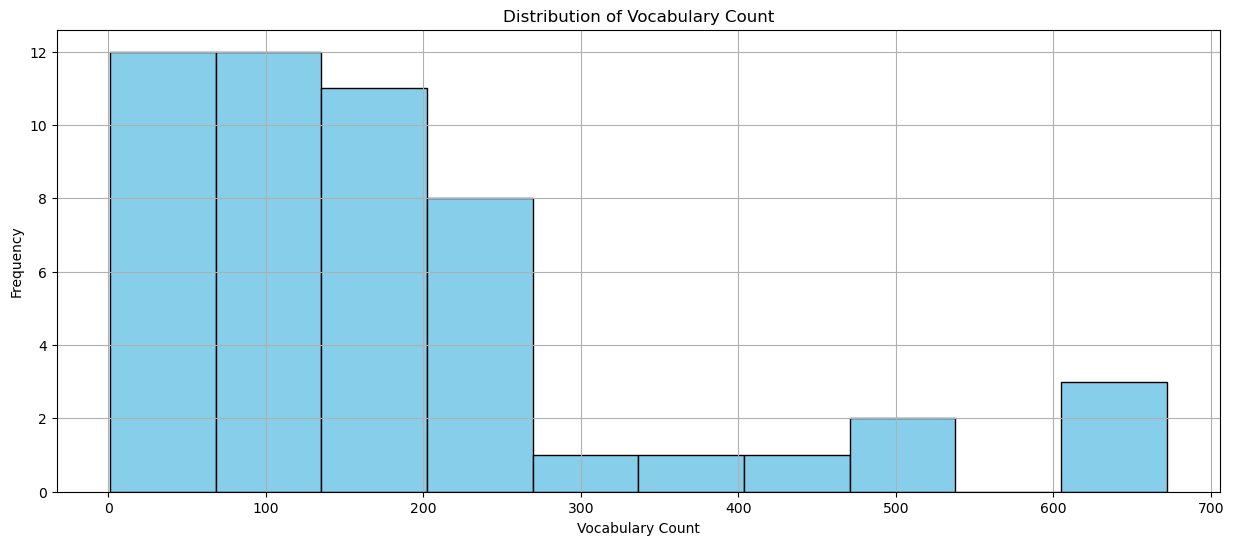

In [52]:
# Vocab count for refinedweb plot

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("refinedweb_sample.csv", header=None)

content_column = df.iloc[:, 0]
vocabcount = []
for content in content_column:
    unique_words = set(content.split(' '))
    vocabcount.append(len(unique_words))
print(vocabcount)
sorted(vocabcount)

plt.figure(figsize=(15, 6))
plt.hist(vocabcount, color='skyblue', edgecolor='black')
plt.xlabel('Vocabulary Count')
plt.ylabel('Frequency')
plt.title('Distribution of Vocabulary Count')
plt.grid(True)
plt.show()

vocabcount[0] = 'vocab_count'
df['vocab_count'] = vocabcount

df.to_csv("refinedweb_sample.csv", header=None, index=None)




    Alkphos  Alk_percentile
0      0.37        2.040816
1      1.30       89.795918
2      1.00       64.285714
3      0.70       31.632653
4      1.70      100.000000
5      0.90       50.000000
6      1.20       82.653061
7      0.80       43.877551
8      1.00       64.285714
9      1.30       89.795918
10     0.80       43.877551
11     0.50       10.204082
12     1.16       78.571429
13     0.70       31.632653
14     1.16       78.571429
15     0.62       22.448980
16     0.70       31.632653
17     1.20       82.653061
18     1.00       64.285714
19     1.00       64.285714
20     1.00       64.285714
21     1.55       97.959184
22     1.00       64.285714
23     0.80       43.877551
24     0.60       16.326531
25     0.90       50.000000
26     1.00       64.285714
27     0.60       16.326531
28     0.60       16.326531
29     0.40        6.122449
30     0.40        6.122449
31     0.70       31.632653
32     1.25       85.714286
33     0.70       31.632653
34     1.00       64

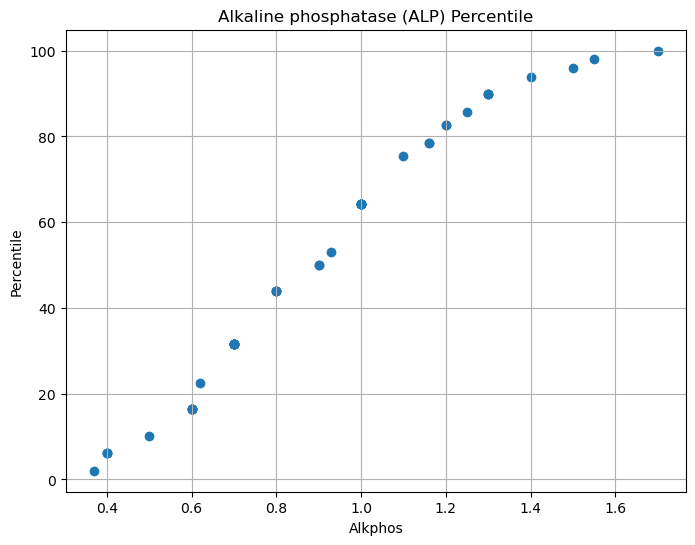

In [35]:
# Age percentile plot

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("selected_dataset_sample.csv")
df['Alk_percentile'] = df['Alkphos'].rank(pct=True) * 100

df.to_csv("selected_dataset_sample.csv", index=None)
result = pd.concat([df['Alkphos'], df['Alk_percentile']], axis=1)


plt.figure(figsize=(8, 6))
plt.scatter(df['Alkphos'], df['Alk_percentile'])
plt.xlabel('Alkphos')
plt.ylabel('Percentile')
plt.title('Alkaline phosphatase (ALP) Percentile')
plt.grid(True)
plt.show()